<a href="https://colab.research.google.com/github/Chirobocea/Numerical-Analysis-and-Methods/blob/main/Proiect_Analiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Echipa:
-311 Costea Razvan
-311 Popa Mihai
-312 Chirobocea Mihail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from matplotlib import ticker, cm

# I  -  R

In [ ]:
# Modify this function:
def define_u(x):
  return sin(x**2)


def s_u():
  x = Symbol('x')
  return define_u(x)

def s_du():
  x = Symbol('x')
  return diff(define_u(x), x)

def s_d2u():
  x = Symbol('x')
  return diff(diff(define_u(x), x), x)

# Modify this functions:
# USE ONLY NP FUNCTIONS! NOT SYMPY
def u(x = None):
  return np.sin(x**2)

def du(x = None):
  return 2*x*np.cos(x**2)

def d2u(x = None):
  return -4*x**2*np.sin(x**2) + 2*np.cos(x**2)

In [ ]:
# you can use this to copy paste the derivatives in the above cell
print(s_u())
print(s_du())
print(s_d2u())

sin(x**2)
2*x*cos(x**2)
-4*x**2*sin(x**2) + 2*cos(x**2)


In [ ]:
def met_baricentrica(X, Y, w, x):
    X_dif = x - X
    if x in X:
        return Y[int(np.where(X_dif == 0)[0])]  
    else:
        return np.dot(w / X_dif, Y) / np.sum(w / X_dif)

In [ ]:
def show_system(a, b):
  print("The system is:")
  print("u''(x)=", s_d2u())
  print("u({})={}".format(a, u(a)))
  print("u'({})={}".format(b, du(b)))
  print()
  print("Exact solution is:")
  print(s_u())
  print()

In [ ]:
def solve_dif_eq(a, b, n):
  #Initial condition
  a0, b0 = u(a), du(b)

  #Equidistant discretization
  X = np.linspace(a, b, n) 
  
  #Step size
  h = X[1]-X[0]

  #Coefficient matrix
  A = []
  #Constant vector
  c = []


  #Adding first equaiton into system
  #u(x_0)=a_0
  row = [1] + [0 for k in range(n-1)]
  A.append(row)
  c.append(a0)

  #We are using the formula for aproximation of the second derivative
  for i in range(1, n-1):
    row = [0 for k in range(i-1)] + [1, -2, 1] + [0 for k in range(n-3-(i-1))]
    A.append(row)
    c.append(d2u(X[i])*(h**2))

  #Adding last equation into system
  row = [0 for k in range(n-2)] + [-1, 1]
  A.append(row)
  c.append(b0*h)


  #Solving the system
  #Y_aprox[k] represent the aproximation u(x_k)
  Y_aprox=np.linalg.solve(A, c)

  
  # Used for baricentric method
  w = []
  for k in range(n):
    diff = X[k] - X
    w.append(1 / np.prod(diff, where=diff!=0))

  #X_discret is a discretization of (a,b) used for ploting
  X_discret = np.linspace(a, b) 
  Y_aprox_discret = []
  for x in X_discret:
    Y_aprox_discret.append(met_baricentrica(X, Y_aprox, w, x))

  #Ploting the solution aproximation
  plt.plot(X_discret, Y_aprox_discret, color ='tab:blue', label ='u aprox')

  Y_exact_discret = []
  for x in X_discret:
    Y_exact_discret.append(u(x))

  #Ploting the exact solution
  plt.plot(X_discret, Y_exact_discret, color ='tab:green', label ='u exact')
  plt.legend()
  plt.title(f"Aprox for n = {n} interpolation points")
  plt.show()

  # #Computing the error
  Y_err_discret = []
  for k in range(len(X_discret)):
    Y_err_discret.append(abs(Y_aprox_discret[k]-Y_exact_discret[k]))
    
  # #Ploting the error
  plt.plot(X_discret, Y_err_discret, color ='tab:red', label ='err')
  plt.legend()
  plt.title(f"Err for n = {n} interpolation points")
  plt.show()

  # #Ploting the error to log scale
  plt.loglog(X_discret, Y_err_discret, color ='tab:red', label ='err')
  plt.legend()
  plt.title(f"LogErr for n = {n} interpolation points")
  plt.show()

The system is:
u''(x)= -4*x**2*sin(x**2) + 2*cos(x**2)
u(2)=-0.7568024953079282
u'(5)=9.912028118634735

Exact solution is:
sin(x**2)


h:  10


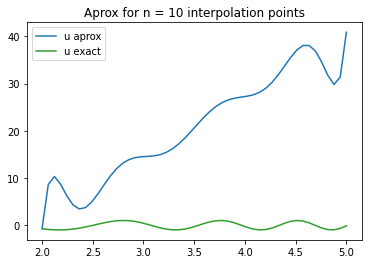

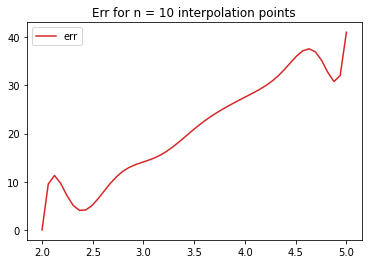

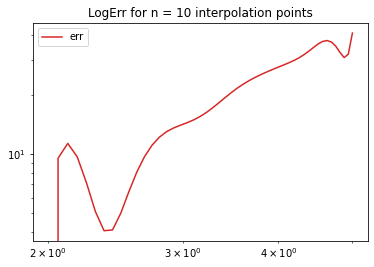


h:  20


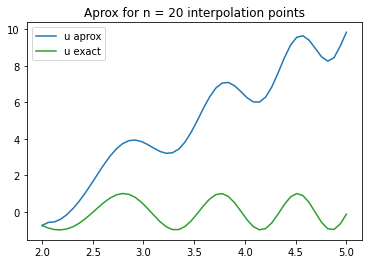

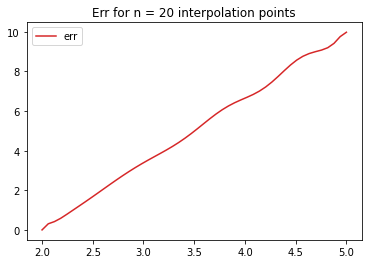

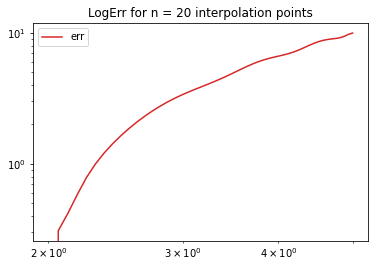


h:  30


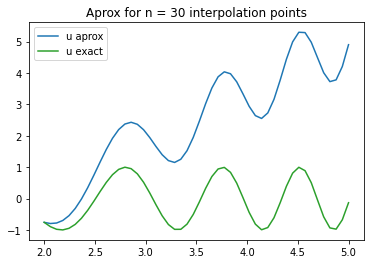

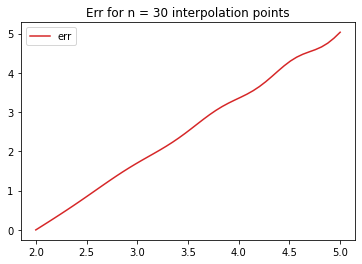

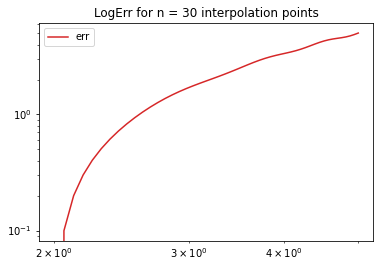


h:  40


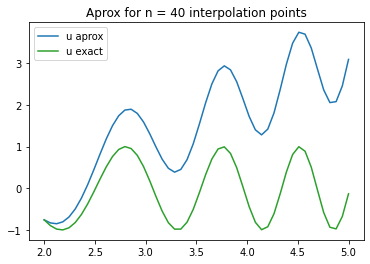

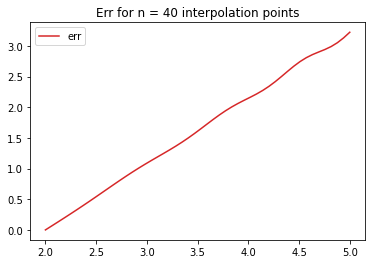

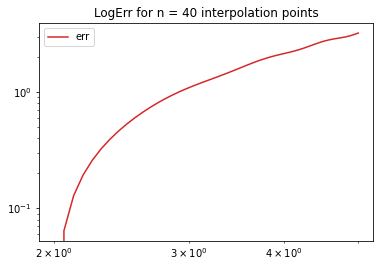


h:  50


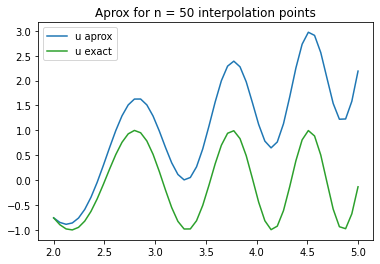

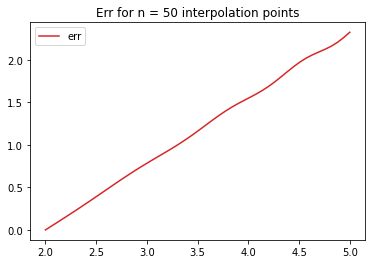

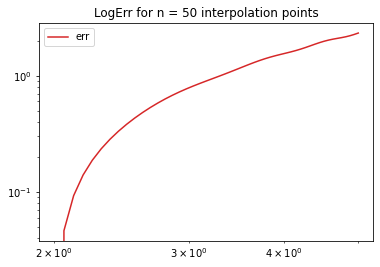


h:  60


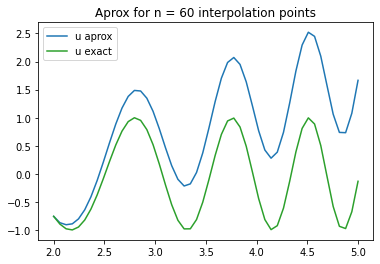

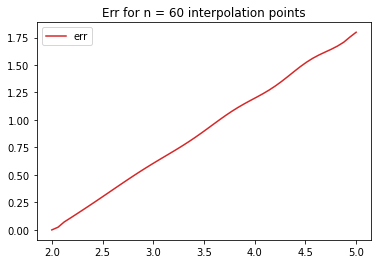

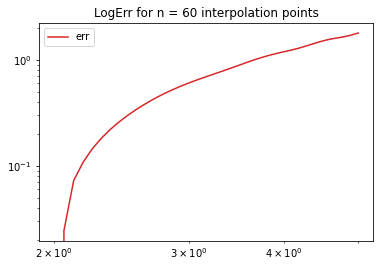


h:  70


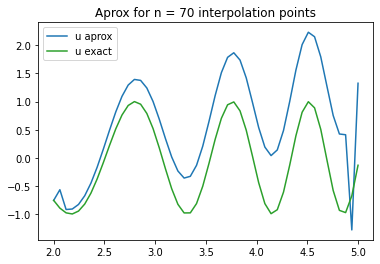

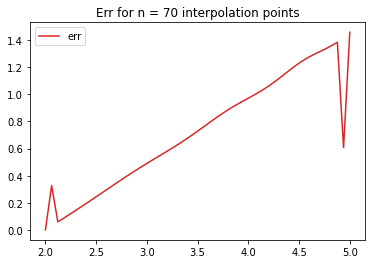

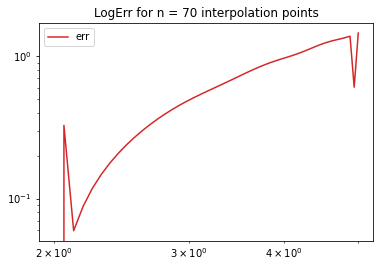


h:  80


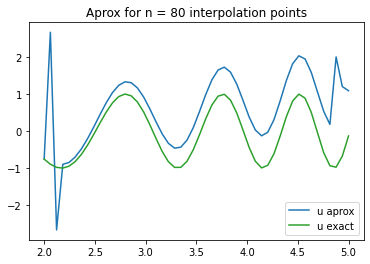

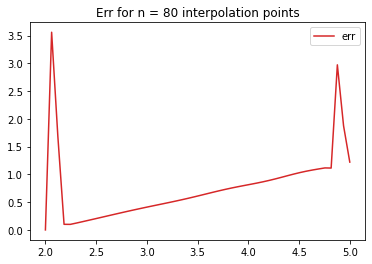

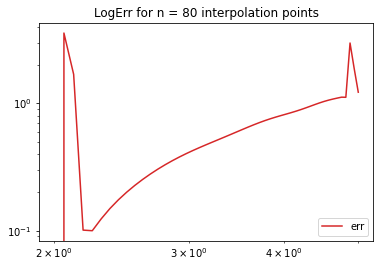


h:  90


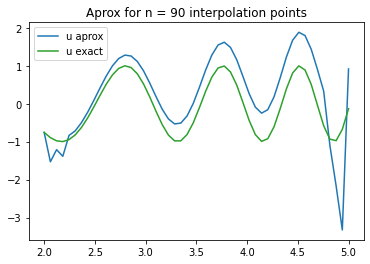

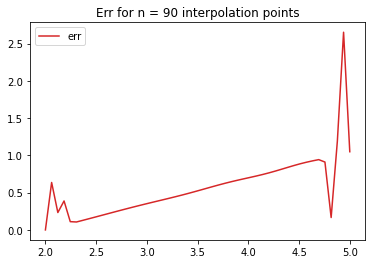

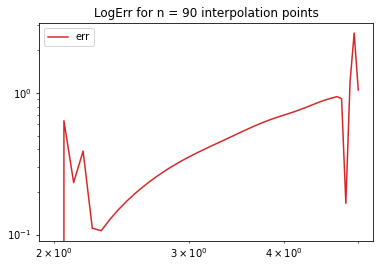


h:  100


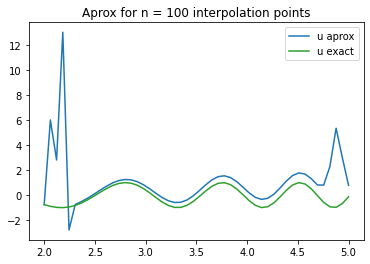

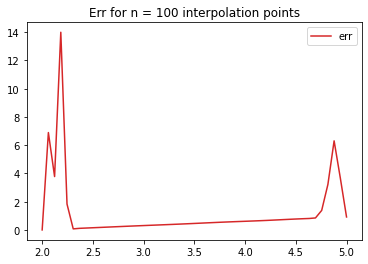

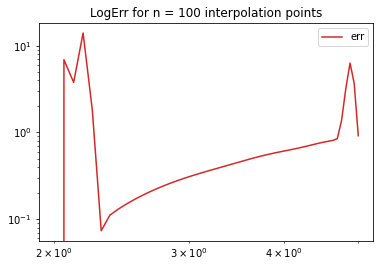

In [ ]:
# Run
a=2
b=5
#Show system
show_system(a, b)
for k in range(10, 101, 10):
  print()
  print("n: ", k)
  solve_dif_eq(a, b, k)

# II - R^2

In [ ]:
# Modify this function:
def define_u(x, y):
  return sin(x)*y

def s_u():
  x = Symbol('x')
  y = Symbol('y')
  return define_u(x, y)

def s_uxx():
  x = Symbol('x')
  y = Symbol('y')
  return diff(diff(define_u(x, y), x), x)

def s_uyy():
  x = Symbol('x')
  y = Symbol('y')
  return diff(diff(define_u(x, y), y), y)

# Modify this functions:
# USE ONLY NP FUNCTIONS! NOT SYMPY
def u(x = None, y = None):
  return np.sin(x)*y

def uxx(x = None, y = None):
  return -np.sin(x)*y

def uyy(x = None, y = None):
  return 0

In [ ]:
# you can use this to copy paste the derivatives in the above cell
print(s_u())
print(s_uxx())
print(s_uyy())

y*sin(x)
-y*sin(x)
0


In [ ]:
def MetLagrange(X, Y, Z, n, x, y):

  # L_i(x)
  L_x = np.ones(n)
  for i in range(n):
      for s in range(n):
          if s != i:
              L_x[i] *= (x-X[s])/(X[i]-X[s])

  # L_j(y)
  L_y = np.ones(n)
  for j in range(n):
      for s in range(n):
          if s != j:
              L_y[j] *= (y-Y[s])/(Y[j]-Y[s])

  # z = 0
  # for i in range(n):
  #   for j in range(n):        
  #     z += Z[i*n+j]*L_x[i]*L_y[j]

  # return z


  # vectorized version
  z = 0
  Z = Z.reshape(n,n)
  L_x = L_x.reshape(-1,1)
  L_y = L_y.reshape(1,-1)
  z = np.sum(np.multiply(Z,np.multiply(L_x,L_y)))
  return z

In [ ]:
def solve2(a, b, n):
  #Equidistant discretization
  X = np.linspace(a, b, n)
  Y = np.linspace(a, b, n)

  #Step size
  h = X[1]-X[0]

  #Coefficient matrix
  A = []
  #Constant vector
  c = []


  for i in range(0, n):
    for j in range(0, n):
      row = np.zeros(n**2)
      # initial condition
      if i in [0, n-1] or j in [0, n-1]:
        row[i*n+j] = 1
        c.append(u(X[i], Y[i]))
      #We are using the formula for aproximation of the second derivative with respect to x and with respct to y
      # i.e uxx+uyy ~
      else:
        row[(i-1)*n+j] = 1
        row[i*n+(j-1)] = 1
        row[i*n+j] = -4
        row[(i+1)*n+j] = 1
        row[i*n+(j+1)] = 1
        c.append((uxx(X[i], Y[i])+uyy(X[i], Y[i]))*h**2)

      A.append(row)

  # Solving the system
  Z = np.linalg.solve(A, c)

  # Aproximation
  X_grafic = np.linspace(a, b)
  Y_grafic = np.linspace(a, b)
  Z_aprox_grafic = np.empty((X_grafic.shape[0], Y_grafic.shape[0]))
  for i in range(X_grafic.shape[0]):
    for j in range(Y_grafic.shape[0]):
      Z_aprox_grafic[i, j] = MetLagrange(X, Y, Z, n, X_grafic[i], Y_grafic[j])

  # Plot
  ax = plt.axes(projection='3d')  
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.contour3D(X_grafic, Y_grafic, Z_aprox_grafic, 50, cmap='rainbow')
  plt.title(f"Aprox for {n**2} interpolation points")
  plt.show()

  # Exact solution
  Z_exact_grafic = np.empty((X_grafic.shape[0], Y_grafic.shape[0]))
  for i in range(X_grafic.shape[0]):
    for j in range(Y_grafic.shape[0]):
      Z_exact_grafic[i, j] = u(X_grafic[i], Y_grafic[i])

  # Plot
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.contour3D(X_grafic, Y_grafic, Z_exact_grafic, 50, cmap='rainbow')
  plt.title("Exact solution")
  plt.show()

  # Computing the error
  Z_err_grafic = np.empty((X_grafic.shape[0], Y_grafic.shape[0]))
  for i in range(X_grafic.shape[0]):
    for j in range(Y_grafic.shape[0]):
      Z_err_grafic[i,j] = abs(Z_aprox_grafic[i,j]-Z_exact_grafic[i,j])

  # Plot error
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.contour3D(X_grafic, Y_grafic, Z_err_grafic, 50, cmap='rainbow')
  plt.title(f"Err for {n**2} interpolation points")
  plt.show()

  # Plot error in log scale
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  Z_log = np.log10(Z_err_grafic)
  ax.contour3D(X_grafic, Y_grafic, Z_log, 50, cmap=cm.viridis)
  zticks = [ 10**(-k) for k in range (1, 20)]
  ax.set_zticks(np.log10(zticks))
  ax.set_zticklabels(zticks)
  plt.title(f"Err log for {n**2} interpolation points")
  plt.show()



n:  10


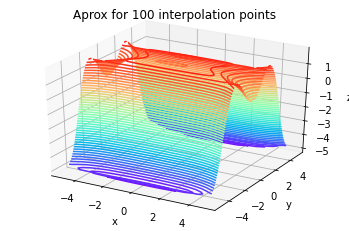

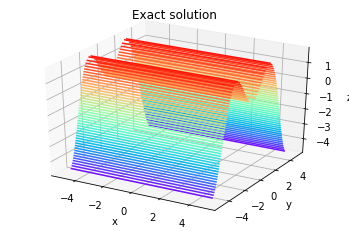

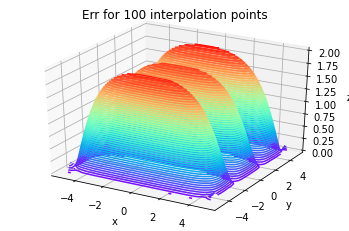

<ipython-input-4-8a52de04d8de>:86: RuntimeWarning: divide by zero encountered in log10
  Z_log = np.log10(Z_err_grafic)


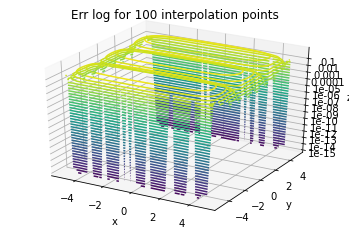


n:  20


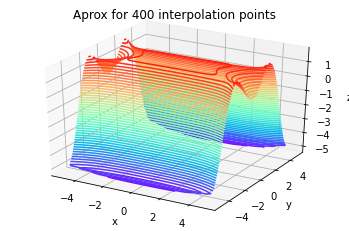

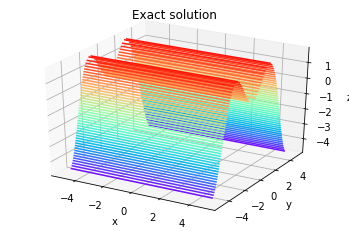

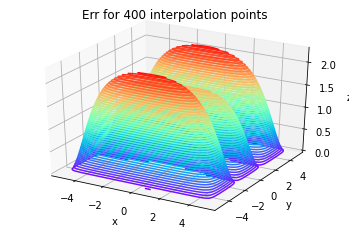

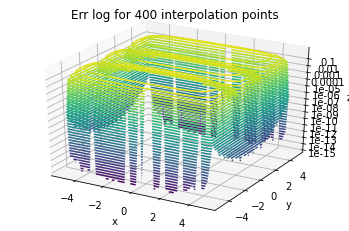


n:  30


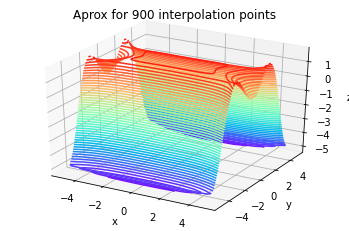

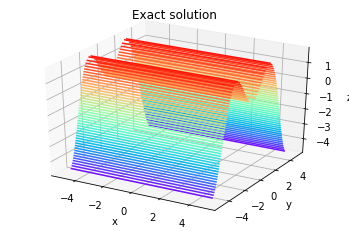

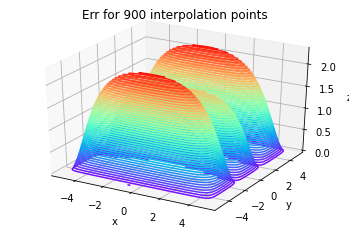

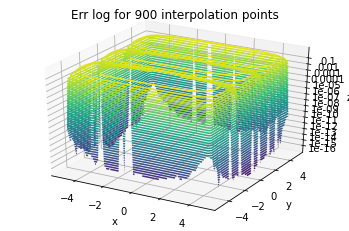


n:  40


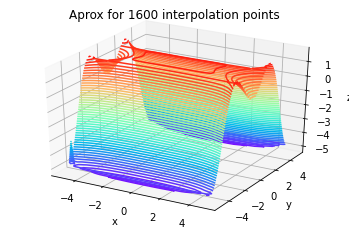

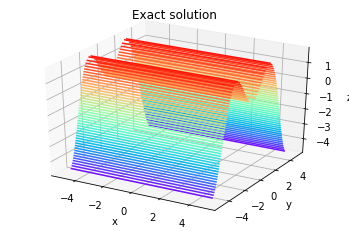

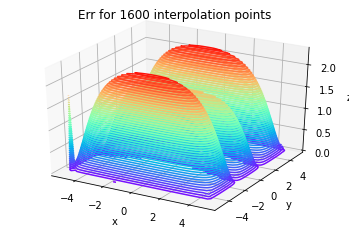

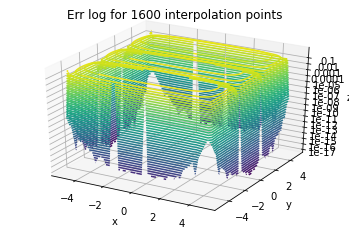


n:  50


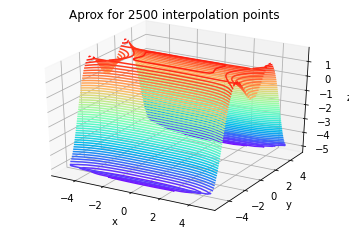

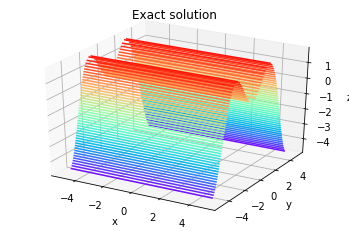

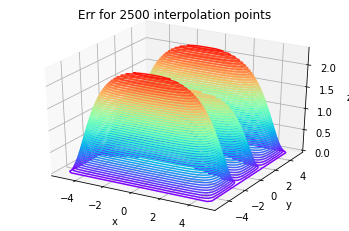

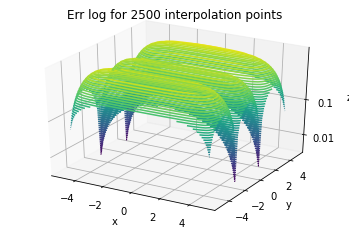

In [ ]:
# Run
a=-5
b=5

for k in range(10, 51, 10):
  print()
  print("n: ", k)
  solve2(a, b, k)